In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)
# 2.6.0
# Create a list with the filepaths for training and testing


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model


2.18.0


In [5]:
from glob import glob

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_dir = '/content/drive/MyDrive/Fruits Classification/train/*'
train_filepaths = list(glob(train_dir+'/*'))
train_filepaths


['/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1812).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1689).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1911).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (17).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1897).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1854).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1883).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1667).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1631).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1870).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1944).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/Apple/Apple (1676).jpeg',
 '/content/drive/MyDrive/Fruits Classification/train/A

In [8]:
test_dir = '/content/drive/MyDrive/Fruits Classification/test/*'
test_filepaths = list(glob(test_dir+'/*'))
test_filepaths

['/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (567).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1973).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1575).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (387).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (909).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (710).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1902).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (54).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1751).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1266).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1793).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1335).jpeg',
 '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1470)

In [9]:
val_dir = '/content/drive/MyDrive/Fruits Classification/valid/*'
val_filepaths = list(glob(val_dir+'/*'))
val_filepaths

['/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_21.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_38.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_15.png',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_30.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_6.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_7.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_22.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_32.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_37.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_28.png',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_29.jpg',
 '/content/drive/MyDrive/Fruits Classification/valid/chickoo fruit/Image_26.jpg',
 '/content/drive/M

In [10]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df


In [11]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)


In [12]:
train_df

,Filepath,Label
0,/content/drive/MyDrive/Fruits Classification/t...,Banana
1,/content/drive/MyDrive/Fruits Classification/t...,Banana
2,/content/drive/MyDrive/Fruits Classification/t...,Mango
3,/content/drive/MyDrive/Fruits Classification/t...,Apple
4,/content/drive/MyDrive/Fruits Classification/t...,chickoo fruit
...,...,...
2791,/content/drive/MyDrive/Fruits Classification/t...,Grape
2792,/content/drive/MyDrive/Fruits Classification/t...,kiwi fruit
2793,/content/drive/MyDrive/Fruits Classification/t...,kiwi fruit
2794,/content/drive/MyDrive/Fruits Classification/t...,Apple


In [13]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2796

Number of different labels: 8

Labels: ['Banana' 'Mango' 'Apple' 'chickoo fruit' 'Grape' 'Strawberry'
 'orange fruit' 'kiwi fruit']


In [14]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/Fruits Classification/t...,Banana
1,/content/drive/MyDrive/Fruits Classification/t...,Banana
2,/content/drive/MyDrive/Fruits Classification/t...,Mango
3,/content/drive/MyDrive/Fruits Classification/t...,Apple
4,/content/drive/MyDrive/Fruits Classification/t...,chickoo fruit


In [15]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
df_unique

,index,Filepath,Label
0,0,/content/drive/MyDrive/Fruits Classification/t...,Banana
1,2,/content/drive/MyDrive/Fruits Classification/t...,Mango
2,3,/content/drive/MyDrive/Fruits Classification/t...,Apple
3,4,/content/drive/MyDrive/Fruits Classification/t...,chickoo fruit
4,6,/content/drive/MyDrive/Fruits Classification/t...,Grape
5,9,/content/drive/MyDrive/Fruits Classification/t...,Strawberry
6,11,/content/drive/MyDrive/Fruits Classification/t...,orange fruit
7,28,/content/drive/MyDrive/Fruits Classification/t...,kiwi fruit


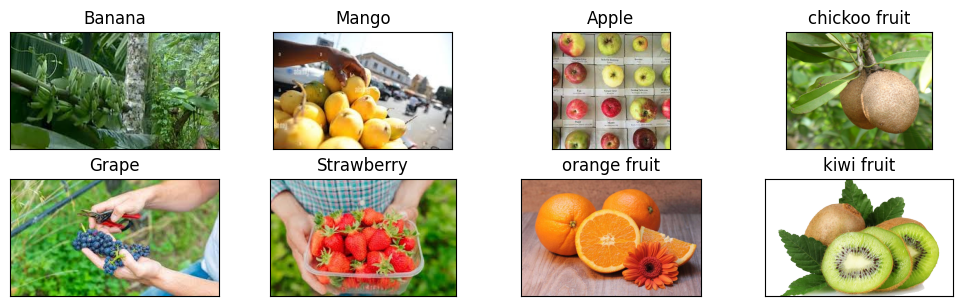

In [16]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,3),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [17]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2796 validated image filenames belonging to 8 classes.


In [18]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 320 validated image filenames belonging to 8 classes.


In [19]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 160 validated image filenames belonging to 8 classes.


mobielnet


In [20]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1180s 13s/step - accuracy: 0.6664 - loss: 0.9888 - val_accuracy: 0.8156 - val_loss: 0.4408
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 353ms/step - accuracy: 0.9368 - loss: 0.1934 - val_accuracy: 0.8406 - val_loss: 0.3999
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 30s 338ms/step - accuracy: 0.9527 - loss: 0.1349 - val_accuracy: 0.8875 - val_loss: 0.3224
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 29s 330ms/step - accuracy: 0.9819 - loss: 0.0609 - val_accuracy: 0.8969 - val_loss: 0.3186
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 351ms/step - accuracy: 0.9914 - loss: 0.0320 - val_accuracy: 0.8781 - val_loss: 0.4309


In [27]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# # Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1



5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 11s/step


['Mango',
 'Banana',
 'Mango',
 'Mango',
 'orange fruit',
 'chickoo fruit',
 'chickoo fruit',
 'Mango',
 'Mango',
 'chickoo fruit',
 'orange fruit',
 'Mango',
 'orange fruit',
 'Grape',
 'Apple',
 'Apple',
 'kiwi fruit',
 'Banana',
 'Banana',
 'Mango',
 'orange fruit',
 'Grape',
 'Strawberry',
 'Mango',
 'Mango',
 'Mango',
 'Grape',
 'Strawberry',
 'Mango',
 'Apple',
 'Banana',
 'Grape',
 'Strawberry',
 'chickoo fruit',
 'Grape',
 'Strawberry',
 'chickoo fruit',
 'chickoo fruit',
 'Grape',
 'chickoo fruit',
 'Apple',
 'kiwi fruit',
 'Mango',
 'Mango',
 'Banana',
 'Strawberry',
 'Strawberry',
 'kiwi fruit',
 'kiwi fruit',
 'orange fruit',
 'orange fruit',
 'Strawberry',
 'Mango',
 'Banana',
 'Mango',
 'Strawberry',
 'Mango',
 'chickoo fruit',
 'kiwi fruit',
 'kiwi fruit',
 'Banana',
 'orange fruit',
 'chickoo fruit',
 'Strawberry',
 'Mango',
 'Banana',
 'Strawberry',
 'orange fruit',
 'orange fruit',
 'Banana',
 'Strawberry',
 'Banana',
 'chickoo fruit',
 'Mango',
 'kiwi fruit',
 'Straw

In [28]:
labels

{0: 'Apple',
 1: 'Banana',
 2: 'Grape',
 3: 'Mango',
 4: 'Strawberry',
 5: 'chickoo fruit',
 6: 'kiwi fruit',
 7: 'orange fruit'}

In [29]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res


In [30]:
img = output('/content/drive/MyDrive/Fruits Classification/fruit/fruit/uploads/Grape_338.jpeg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


'Grape'

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
# model = tf.keras.models.load_model('/content/fruits8.keras')

In [32]:
model.save('fruits8.keras')  # NEW

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('fruits8.keras')

def preprocess_image(image_path):
    # Load and preprocess a single image
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define your class labels
labels = {0: 'Apple',
 1: 'Banana',
 2: 'Grape',
 3: 'Mango',
 4: 'Strawberry',
 5: 'chickoo fruit',
 6: 'kiwi fruit',
 7: 'orange fruit'}
# Path to your single test image
test_image_path = '/content/drive/MyDrive/Fruits Classification/test/Apple/Apple (1133).jpeg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/test/Banana/Banana (2044).jpeg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/test/Grape/Grape (1073).jpeg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/test/Mango/Mango (275).jpeg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/test/Strawberry/Strawberry (122).jpeg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/train/chickoo fruit/Image_1 - Copy (12).jpg'
test_image_path = '/content/drive/MyDrive/Fruits Classification/test/chickoo fruit/Image_14.jpg'
# test_image_path = '/content/drive/MyDrive/Fruits Classification/test/orange fruit/Image_10.jpg'


# Preprocess the single test image
processed_image = preprocess_image(test_image_path)

# Perform prediction on the preprocessed image using the loaded model
predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class = labels[predicted_class_index]

print("Predicted Class Label:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class Label: chickoo fruit
